<h1>Coursera Andrew NG Machine Learning Course Week 3 in Python</h1>
<p>Hre, I will implement logistic regression and apply it to two different datasets.</p>

<h3>Importing packages</h3>
<ol>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading the dataset</li>
    <li>Scipy.optimize's fmin_tnc, for advanced optimization algorithm</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_tnc

<h2>Logistic Regression</h2>
<p>In this part, we will build a logistic regression model to predict whether a student gets admitted into a university.</p>

<h3>Reading the dataset</h3>
<p>Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.</p>
<p>Our task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.</p>
<p>Using pandas's read_csv() function, we read the dataset 'ex2data1.txt', store the resultant DataFrame into a variable called 'dataset'. Next, we rename the columns for our convenience and then, print the first five lines of our dataset.</p>

In [2]:
dataset = pd.read_csv('ex2data1.txt', header=None)
dataset.columns = ['Exam1', 'Exam2', 'Admitted']
print(dataset.head())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


<h3>Feature Extraction</h3>
<p>We now separate our dataset into two parts :</p>
<ol>
    <li>Features (Exam1 and Exam2 scores of the students)</li>
    <li>Labels (Whether the student is admitted or not)</li>
</ol>
<p>After separation of our dataset, we add 1's column to our features so that matrix multiplication becomes easier</p>

In [3]:
admitted_students = dataset.loc[dataset['Admitted'] == 1]
not_admitted_students = dataset.loc[dataset['Admitted'] == 0]

features = dataset[['Exam1', 'Exam2']].values
features = np.column_stack((np.ones(features.shape[0]), features))
labels = dataset['Admitted'].values
print(features[:5])
print(labels[:5])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[0 0 0 1 1]


<h3>Visualizing the dataset</h3>
<p>We now plot a scatter plot between Exam 1 scores and Exam 2 scores for admitted students (black) and not admitted students (yellow)</p>

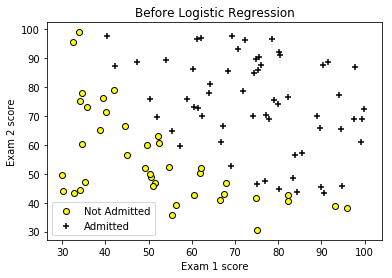

In [4]:
plt.scatter(not_admitted_students['Exam1'], not_admitted_students['Exam2'], color="yellow", edgecolors="black")
plt.scatter(admitted_students['Exam1'], admitted_students['Exam2'], color="black", marker="+")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Before Logistic Regression')
plt.legend(['Not Admitted', 'Admitted'])
plt.show()

<h3>Cost function</h3>
<p>The logistic regression hypothesis is defined as :</p>
<img src="https://lh6.googleusercontent.com/YLj7urDpb3LubdUz_Jq2xl-Lm5KVPvVZPvYo078tPK-XreLBqImRcKTtOvbbqH_CQ0dlw2VcN4fTwLiNdPbvfBLwmV8i4VOhJoH39pG3nZ45uVRGJhhlUPiJthADjOediA" />
<p>where function g is the sigmoid function as shown above.</p>
<p>Evaluating our cost function for 0, it should result in 0.5</p>

In [5]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

print(sigmoid_function(0))

0.5


<h3>Cost function and gradient</h3>
<p>The logistic function restricts the output values to be in the range of 0 and 1.</p>
<p>The intuition of using the logistic function is that it will give us the probability that our output is 1. E.g : h(x) = 0.7 implies that there is 70% chance that our output is 1.</p>
<p>The cost function in logistic regression is as follows :-</p>
<img src="https://camo.githubusercontent.com/ef54d4fa4553c2fa8643e4f22942e5cfd4870b50/68747470733a2f2f6c68362e676f6f676c6575736572636f6e74656e742e636f6d2f486c6b77664770394c4b79463066663544554a4b526777556a702d7768316e496b544132684c4c757049514445655f41384d4364697a4342784e356b657061347a426e7636636b7034345a556c6b4b326331746d732d476742356643424459314f72384f654e574d33434a5a6e484552314737704b7535786d43486d416d63563777" />
<p>Notice that when y is equal to 1, then the second term will be zero and will not affect the result. If y is equal to 0, then the first term will be zero and will not affect the result. For incorrect outputs, the cost function gets penalized heavily.</p>
<p>We also use gradient descent as our optimization algorithm. Gradient descent provides us the optimized values of theta that best divides the given data. It looks as follows :</p>
<img src="https://camo.githubusercontent.com/fbe5097e6a3391e7f852a050387218506f8d6127/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f302a38797a766437515a4c6e3554315857672e6a7067" />
<p>In above, we make a separate function for calculating only the gradient (second term in above formula)</p>

In [6]:
def hypothesis(theta, x):
    return sigmoid_function(np.dot(x, theta))

def cost_function(theta, x, y):
    m = y.shape[0]
    h = hypothesis(theta, x)
    return (-1 / m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))

def gradient(theta, x, y):
    m = y.shape[0]
    h = hypothesis(theta, x)
    return (1 / m) * (np.dot(x.T, h - y))

<h3>Learning parameters using fmin_tnc</h3>
<p>Now, we need to optimize the theta values as fast as possible. To do that from scratch is difficult. Instead, we borrow that functionality from Scipy library. This library contains various advance optimization algorithms under the 'optimize' submodule.</p>
<p>We will be using the 'fmin_tnc() function which takes the following parameters :</p>
<ol>
    <li>func : The name of the user-defined cost function (in our case, cost)</li>
    <li>x0 : Initial values of theta</li>
    <li>fprime : The name of the user-defined gradient function (in our case, gradient)</li>
    <li>args : The tuple consisting of features (x) and labels (y)</li>
</ol>
<p>This function returns the optimized values of theta in it's first element.</p>

In [7]:
def fit(x, y):
    theta = np.zeros(x.shape[1])
    theta = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x,y))
    return theta[0]

theta = fit(features, labels)
print(theta)
print(round(cost_function(theta, features, labels), 3))

[-25.16131865   0.20623159   0.20147149]
0.203


<h3>Visualizing the decision boundary</h3>
<p>As there are two features, the linear equation can be represented by :</p>
<img src="https://camo.githubusercontent.com/6a3add6baab679befcc56cb0f0310d2137488430/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a70344a4648486c506f3550565a5963337555687041672e706e67" />
<p>The decision boundary can be found by setting the weighted sum of inputs to 0. Equating h(x) to 0, gives us :</p>
<img src="https://camo.githubusercontent.com/e2646f4744a2d74dc8f6c3aee3c04090ab20aff0/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a6f5476386a6a71342d6f6a4f457a696c55336f5366672e706e67" />
<p>We will plot our descision boundary on top of the scatter plot we already made previously.</p>

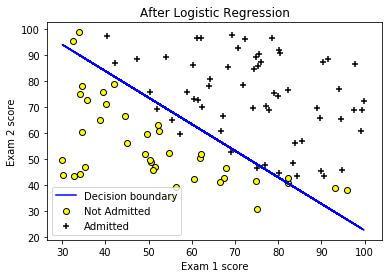

In [8]:
x_vals = features[:,1]
pred_y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]

plt.scatter(not_admitted_students['Exam1'], not_admitted_students['Exam2'], color="yellow", edgecolor="black")
plt.scatter(admitted_students['Exam1'], admitted_students['Exam2'], color="black", marker="+")
plt.plot(x_vals, pred_y_vals, color="blue")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Decision boundary', 'Not Admitted', 'Admitted'])
plt.title('After Logistic Regression')
plt.show()

<h3>Evaluating logistic regression</h3>
<p>After learning the parameters, we can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.</p>

In [9]:
def predict(x1, x2):
    global theta
    x = np.array([1, x1,x2])
    prob =  round(sigmoid_function(np.dot(x, theta)), 3)
    label = 1 if prob >= 0.5 else 0
    return prob, label

prediction = predict(45, 85)
print("Probability : ", prediction[0])
print("Admitted" if prediction[1] == 1 else "Not Admitted")

Probability :  0.776
Admitted


<p>Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set.The accuracy function reports the training accuracy of your classifier by computing the percentage of examples it got correct.</p>

In [10]:
def accuracy(x, y):
    global theta
    probabilities = sigmoid_function(np.dot(x, theta))
    labels = np.where(probabilities >= 0.5, 1, 0)
    return (np.count_nonzero(labels == y) / y.shape[0]) * 100

print("Training Accuracy : ", accuracy(features, labels))

Training Accuracy :  89.0


<h2>Regularized Logistic Regression</h2>
<p>In this part, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.</p>

<h3>Reading the dataset</h3>
<p>
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.</p>
<p>Using pandas's read_csv() function, we read our dataset, store the resultant DataFrame into a variable called 'dataset'. We rename the columns for our convenience and print the first 5 lines of our dataset.</p>

In [11]:
dataset = pd.read_csv('ex2data2.txt', header=None)
dataset.columns = ['Test1', 'Test2', 'Passed']
print(dataset.head())

      Test1    Test2  Passed
0  0.051267  0.69956       1
1 -0.092742  0.68494       1
2 -0.213710  0.69225       1
3 -0.375000  0.50219       1
4 -0.513250  0.46564       1


<h3>Feature Extraction</h3>
<p>We now separate our dataset into two parts :</p>
<ol>
    <li>Features (Test1 and Test2 scores of the microchips)</li>
    <li>Labels (Whether the microchip passed the QA or not)</li>
</ol>

In [12]:
passed_chips = dataset.loc[dataset['Passed'] == 1]
not_passed_chips = dataset.loc[dataset['Passed'] == 0]

features = dataset[['Test1', 'Test2']].values
labels = dataset['Passed'].values
print(features.shape)
print(labels.shape)

(118, 2)
(118,)


<h3>Visualizing the data</h3>
<p>We now plot a scatter plot between Test 1 scores and Test 2 scores for microchip QA</p>

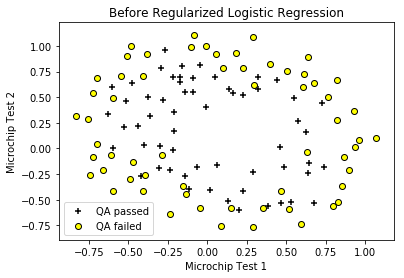

In [13]:
plt.scatter(passed_chips['Test1'], passed_chips['Test2'], color="black", marker="+")
plt.scatter(not_passed_chips['Test1'], not_passed_chips['Test2'], color="yellow", edgecolor="black")
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['QA passed', 'QA failed'])
plt.title('Before Regularized Logistic Regression')
plt.show()

<h3>Feature mapping</h3>
<p>One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.</p>
<p>map_features = [1, x<sub>1</sub>, x<sub>2</sub>, x<sub>1</sub><sup>2</sup>, x<sub>1</sub>.x<sub>2</sub>, x<sub>2</sub><sup>2</sup>, x<sub>1</sub><sup>3</sup>, ... , x<sub>1</sub>.x<sub>2</sub><sup>5</sup>, x<sub>2</sub><sup>6</sup>]</p>
<p>As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.</p>
<p>As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.</p>

In [14]:
def map_features(x1, x2):
    degree = 6
    out = np.ones(x1.shape[0])[:,np.newaxis]
    for i in range(1,degree + 1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(x1, i - j), np.power(x2, j))[:,np.newaxis]))
    return out


features = map_features(features[:,0], features[:,1])
print(features.shape)
print(features[:2])

(118, 28)
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01  1.34745327e-04  1.83865725e-03
   2.50892595e-02  3.42353606e-01  6.90798869e-06  9.42624411e-05
   1.28625106e-03  1.75514423e-02  2.39496889e-01  3.54151856e-07
   4.83255257e-06  6.59422333e-05  8.99809795e-04  1.22782870e-02
   1.67542444e-01  1.81563032e-08  2.47750473e-07  3.38066048e-06
   4.61305487e-05  6.29470940e-04  8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01 -7.97681228e-04  5.89122275e-03
  -4.35092419e-02  3.21334672e-01  7.39785525e-05 -5.46363780e-04
   4.03513411e-03 -2.98012201e-02  2.20094970e-01 -6.86091891e-06
   5.06708697e-05 -3.74226408e-04  2.76382476e-03 -2.04120477e-02
   1.50751849e-01  6.36295342e-07 -4.69931780e-06  3.47065055e-05
  -2.56322636e-04  1.89305413e-03 -1.39810280e-02  1.03255971e-01]]


<h3>Cost function and gradient</h3>
<p>Now we will implement code to compute the cost function and gradient for regularized logistic regression.</p>
<p>Recall that the regularized cost function in logistic regression is :</p>
<img src="http://www.holehouse.org/mlclass/07_Regularization_files/Image%20[5].png" />
<p>The gradient of the cost function is a vector where the jth element is defined as follows:</p>
<img src="https://i0.wp.com/www.scienceprog.com/wp-content/uploads/2017/01/gradient_regularized.png?resize=600%2C173" />

In [15]:
def regularized_cost_function(theta, x, y, lamda):
    m = y.shape[0]
    cost_normal = cost_function(theta, x, y)
    regularization_term = (lamda / (2 * m)) * np.sum(theta[1:] ** 2)
    return (cost_normal + regularization_term)

def regularized_gradient(theta, x, y, lamda):
    m = y.shape[0]
    gradient_term = gradient(theta, x, y)
    gradient_term[1:] += (lamda / m) * theta[1:]
    return gradient_term

theta = np.zeros(features.shape[1])
print(round(regularized_cost_function(theta, features, labels, 1), 3))

0.693


<h3>Learning parameters using fmin_tnc</h3>
<p>Now, we need to optimize the theta values as fast as possible. To do that from scratch is difficult. Instead, we borrow that functionality from Scipy library. This library contains various advance optimization algorithms under the 'optimize' submodule.</p>
<p>We will be using the 'fmin_tnc() function which takes the following parameters :</p>
<ol>
    <li>func : The name of the user-defined cost function (in our case, cost)</li>
    <li>x0 : Initial values of theta</li>
    <li>fprime : The name of the user-defined gradient function (in our case, gradient)</li>
    <li>args : The tuple consisting of features (x), labels (y) and lamda</li>
</ol>
<p>This function returns the optimized values of theta in it's first element.</p>

In [16]:
def fit(x,y):
    lamda = 1
    theta = np.zeros(x.shape[1])
    theta = fmin_tnc(func=regularized_cost_function, x0=theta.flatten(), fprime=regularized_gradient, args=(x,y,lamda))
    return theta[0]

theta = fit(features, labels)
print(theta)

[ 1.27271026  0.62529965  1.18111686 -2.01987399 -0.9174319  -1.43166929
  0.12393228 -0.36553118 -0.35725403 -0.17516292 -1.45817009 -0.05098418
 -0.61558554 -0.27469165 -1.19271298 -0.24217841 -0.20603299 -0.04466178
 -0.2777895  -0.29539513 -0.45645982 -1.04319154  0.02779373 -0.2924487
  0.0155576  -0.32742405 -0.1438915  -0.92467487]


<h3>Plotting the decision boundary</h3>
<p>Using a function called mapFeaturePlot, we get the values of hypothesis and then build a contour plot around the previously plotted scatter plot.</p>

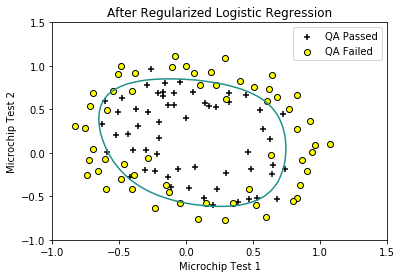

In [17]:
def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j)
            out = np.hstack((out,terms))
    return out

u_vals = np.linspace(-1,1.5,50)
v_vals = np.linspace(-1,1.5,50)
z = np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta

plt.scatter(passed_chips['Test1'], passed_chips['Test2'], color="black", marker="+")
plt.scatter(not_passed_chips['Test1'], not_passed_chips['Test2'], color="yellow", edgecolor="black")
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['QA Passed', 'QA Failed'])
plt.title('After Regularized Logistic Regression')
plt.show()